# Algoritmo de Newton

### Función de prueba

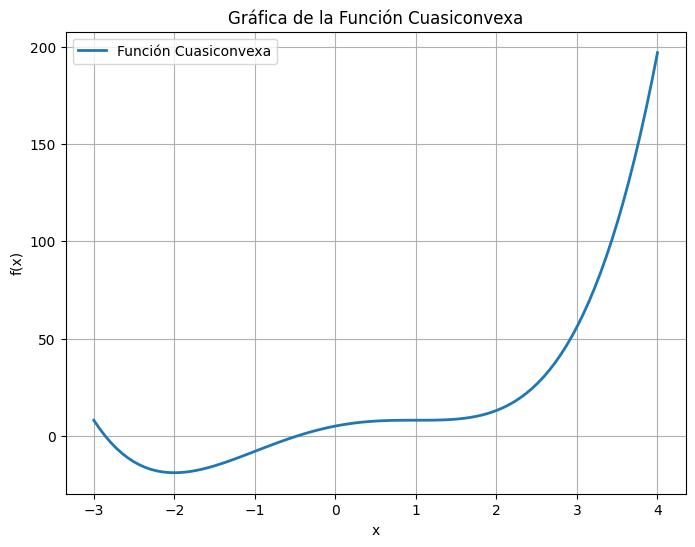

La función f(x) = x⁴ - 6x² + 8x + 5 tiene:
- Primera derivada: f'(x) = 4x³ - 12x + 8
- Segunda derivada: f''(x) = 12x² - 12


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return x**4 - 6*x**2 + 8*x + 5

# Graficar función
# Generar valores de x
x_values = np.linspace(-3, 4, 100)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa', linewidth=2)
plt.title('Gráfica de la Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"La función f(x) = x⁴ - 6x² + 8x + 5 tiene:")
print(f"- Primera derivada: f'(x) = 4x³ - 12x + 8")
print(f"- Segunda derivada: f''(x) = 12x² - 12")

### Desarrollo del algoritmo

In [23]:
def derivada(func, x, h=1e-8):
    """Calcula la derivada numérica de una función"""
    return (func(x + h) - func(x - h)) / (2 * h)

def segunda_derivada(func, x, h=1e-8):
    """Calcula la segunda derivada numérica de una función"""
    return (func(x + h) - 2*func(x) + func(x - h)) / (h**2)

def main_step():
  epsilon = 1e-6
  lambda_k = 0.60
  max_iterations = 100
  iteration = 0
  
  while iteration < max_iterations:
    primera_der = derivada(quasiconvex_function, lambda_k)
    segunda_der = segunda_derivada(quasiconvex_function, lambda_k)
    
    # Check if second derivative is too close to zero
    if abs(segunda_der) < 1e-10:
      print("El método no es viable: segunda derivada muy pequeña")
      return lambda_k  # Return current value instead of undefined lambda_k1
    
    lambda_k1 = lambda_k - (primera_der / segunda_der)
    print(f"Iteración {iteration + 1}: λ = {lambda_k1:.6f}")
    
    # Check convergence
    if abs(lambda_k1 - lambda_k) < epsilon and abs(primera_der) < epsilon:
      return lambda_k1  # Return the converged value
    
    lambda_k = lambda_k1
    iteration += 1

  return lambda_k  # Return final value if max iterations reached

minimo = main_step()
print(f"El mínimo se encuentra en x = {minimo}, con un valor de f(x) = {quasiconvex_function(minimo)}")


El método no es viable: segunda derivada muy pequeña
El mínimo se encuentra en x = 0.6, con un valor de f(x) = 7.7696
